# Generative model based on Gaussian mixtures

Gaussian mixtures are a natural mathematical generalization of the K-means algorithm. Essentially, the approach looks for some mixture of multivariate normal distributions (essentially also clumps around the mean with their variance) rather than just some clumps around the forming centroids. Since this approach estimates probability densities, it is often used in KDE (kernel density estimation) tasks. Among other things, it can be applied to the generation task: if there is a probability density function, we can sample and get new objects. In this task, we will look at the simplest example of solving such a problem.

Again, we'll be working with `MNIST`. Since the model turns out to be extremely heavy, we will use a "simple" dataset. Let's visualize the elements of this dataset (for clarity).

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.data.shape

(1797, 64)

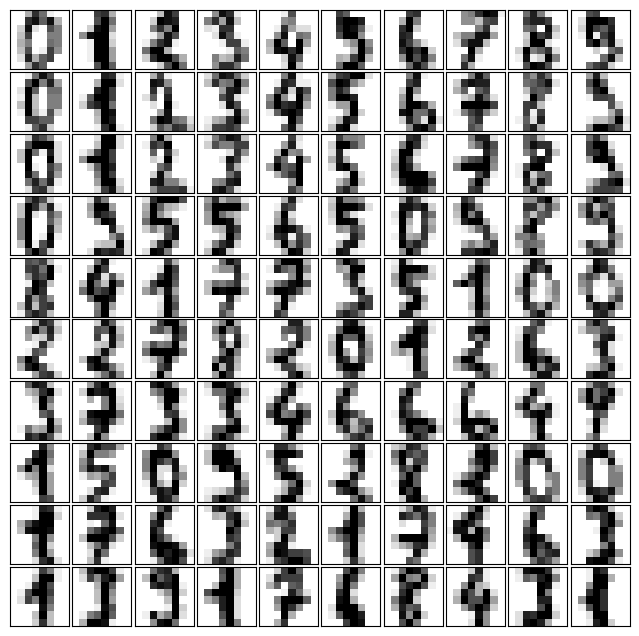

In [5]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits.data[i].reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

To make the training faster, it makes sense to reduce the dimensionality of the feature space. Perform the transformations for the entire dataset using <code>PCA(n_components=0.99, svd_solver=='full')</code>.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, svd_solver='full')
data = digits.data
model_pca = pca.fit(data)
data_pca = pca.fit_transform(data)

Enter the number of principal components obtained.

In [24]:
components = model_pca.components_
num_components_from_components = components.shape[0]
num_components_from_components
num_components = pca.n_components_
print(num_components, num_components_from_components)

41 41


We train the model of interest by selecting the hyperparameter responsible for the number of components used, minimizing the <a href="https://en.wikipedia.org/wiki/Akaike_information_criterion">Akaike information criterion</a>.

For <code>n_components</code> values in the range \([50,250)\) in increments of \(10\) train models <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html"><code>GaussianMixture</code></a> with the parameters specified in your assignment. Use the method <code>.aic()</code> to calculate the criterion value of each model.

Enter the <code>n_components</code> value of the model with the lowest value of the Akaike criterion.

In [34]:
from sklearn.mixture import GaussianMixture

n_components_range = range(50, 250, 10)

# Store the AIC values
aic_scores = {}

# Loop through the number of components to train a model for each
for n_components in n_components_range:
    # Train Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=9)
    gmm.fit(data_pca)

    # Calculate AIC
    aic = gmm.aic(data_pca)
    aic_scores[n_components] = aic
    print(f"n_components = {n_components}, AIC = {aic}")

# Find the n_components value with the lowest AIC
best_n_components = min(aic_scores, key=aic_scores.get)

print(f"\nn_components value with the lowest AIC: {best_n_components}")

n_components = 50, AIC = 178565.9717748201
n_components = 60, AIC = 104900.61168184083
n_components = 70, AIC = 42093.62648832463
n_components = 80, AIC = -15476.52470473107
n_components = 90, AIC = -54472.488534200995
n_components = 100, AIC = -85574.11305190576
n_components = 110, AIC = -110681.89968673699
n_components = 120, AIC = -124731.22826693428
n_components = 130, AIC = -150061.54722945055
n_components = 140, AIC = -162783.3527324209
n_components = 150, AIC = -182283.74215671688
n_components = 160, AIC = -186662.67079530604
n_components = 170, AIC = -188412.37786688685
n_components = 180, AIC = -184406.83426297735
n_components = 190, AIC = -185214.42228659068
n_components = 200, AIC = -181589.26104222145
n_components = 210, AIC = -175374.29472464696
n_components = 220, AIC = -175242.70587984403
n_components = 230, AIC = -166729.16827891348
n_components = 240, AIC = -157600.66779676639

n_components value with the lowest AIC: 170


In [35]:
n_components_range = range(50, 250, 10)

# Store the AIC values
aic_scores = {}

# Loop through the number of components to train a model for each
for n_components in n_components_range:
    # Train Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=9)
    gmm.fit(data)

    # Calculate AIC
    aic = gmm.aic(data)
    aic_scores[n_components] = aic
    print(f"n_components = {n_components}, AIC = {aic}")

# Find the n_components value with the lowest AIC
best_n_components = min(aic_scores, key=aic_scores.get)

print(f"\nn_components value with the lowest AIC: {best_n_components}")

n_components = 50, AIC = -145353.5324884141
n_components = 60, AIC = -213952.00946918945
n_components = 70, AIC = -262924.49713408574
n_components = 80, AIC = -301207.52250416984
n_components = 90, AIC = -313536.2885111547
n_components = 100, AIC = -334298.19517448545
n_components = 110, AIC = -333563.0949282204
n_components = 120, AIC = -337148.33756213915
n_components = 130, AIC = -323876.2487345217
n_components = 140, AIC = -305372.4095371271
n_components = 150, AIC = -303868.31819839496
n_components = 160, AIC = -279760.5011299476
n_components = 170, AIC = -261143.18401916185
n_components = 180, AIC = -237610.7286748808
n_components = 190, AIC = -206927.0130821598
n_components = 200, AIC = -184150.4779816185
n_components = 210, AIC = -152396.30834306264
n_components = 220, AIC = -124984.85980310268
n_components = 230, AIC = -97497.97068965435
n_components = 240, AIC = -62060.28303706972

n_components value with the lowest AIC: 120


Train the final model on the selected hyperparameter. Check that the training has converged (the field <code>.converged_</code> of the model).

In [88]:
gmm = GaussianMixture(n_components=170, covariance_type='full', random_state=9)
gmm.fit(data_pca)
gmm.converged_

True

In [41]:
gmm = GaussianMixture(n_components=120, covariance_type='full', random_state=9)
gmm.fit(data_pca)
gmm.converged_

True

Use the method <code>.sample()</code> to generate $100$ new objects.

Enter the sample mean of the cooridnates with index $0$ of the generated objects.

In [89]:
import numpy as np
# Generate 100 new samples
samples, _ = gmm.sample(100)

# Calculate the mean of the coordinates with index 0
sample_mean_index_0 = np.mean(samples[0, :])

print(f"Sample mean of the coordinates with index 0: {sample_mean_index_0}")
samples.shape

Sample mean of the coordinates with index 0: 0.9808156824203416


(100, 41)

Using the <code>.inverse_transform()</code> method of the class <code>PCA</code>, return the generated objects to the original feature space.

In [66]:
generated_data = pca.inverse_transform(samples)

Visualize the results. Enter the image number corresponding to the generated object with the index specified in your assignment (indexing starts from zero).

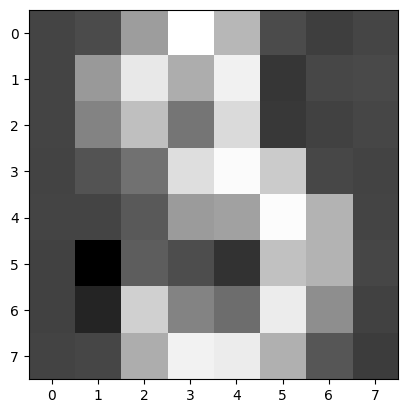

In [90]:
plt.imshow(generated_data[5].reshape(8, 8), cmap='gray')